In [42]:
path_coordinates_cache = "coordinates_cache_post2000.csv"
path_buildings = "../../Algandmed/Ehitised/Elamud_post2000.csv"

import locale
locale.setlocale(locale.LC_ALL, 'de')

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

buildings = pd.read_csv(path_buildings)
coords = pd.read_csv(path_coordinates_cache, index_col=0)
merged = buildings.merge(coords, how='left', left_on="Aadress tekstina kehtiv", right_index=True)

c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


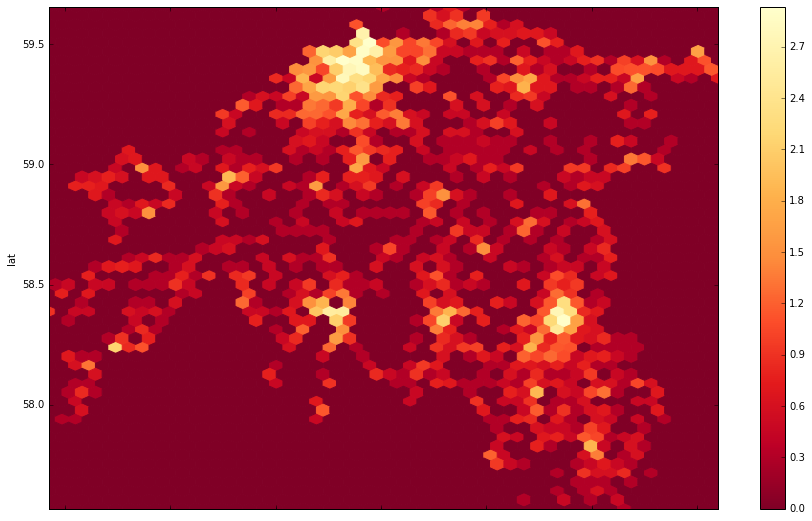

In [2]:
merged.plot(kind='hexbin', x='lng', y='lat', gridsize=50, bins='log',  figsize=(15, 9), cmap=plt.cm.YlOrRd_r);

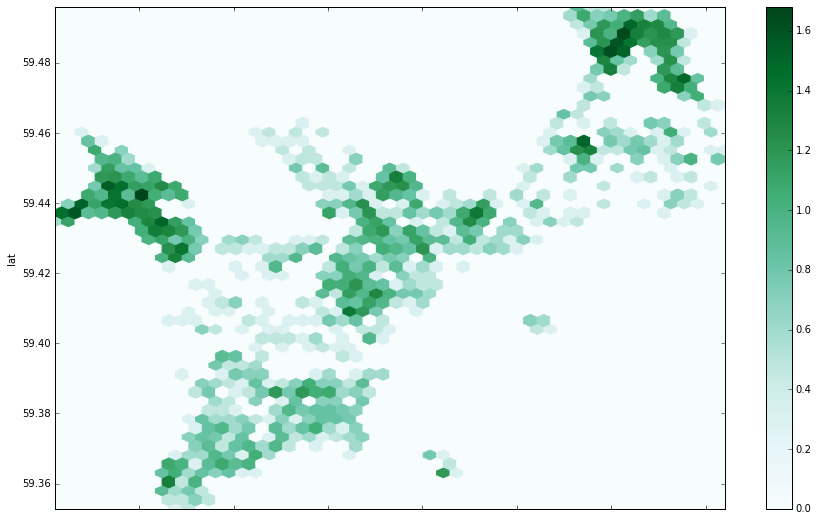

In [3]:
def plot_omavalitsus(df,code):
    omavalitsus = df[df["Omavalitsuse kood"]==code]
    omavalitsus.plot(kind='hexbin', x='lng', y='lat', gridsize=50,
                     bins='log',  figsize=(15, 9), cmap=plt.cm.BuGn);

plot_omavalitsus(merged,784)

In [87]:
merged["Esmane Kasutus"] = pd.to_datetime(merged["Esmane Kasutus"], format='%Y')
merged.to_csv("../../Merged.csv", encoding='utf-8', date_format='%Y/%m/%d')

In [11]:
merged.columns

Index(['Id', 'Ehr Kood', 'Nimetus', 'Seisundi kood', 'Seisundi nimi',
       'Kaos Id Peamine', 'KAOS kood Peamine', 'Peamine KAOS',
       'Omandi liigi kood', 'Omandi liigi nimii', 'Aadress tekstina kehtiv',
       'Rajatis Hoone', 'Maakonna kood', 'Omavalitsuse kood',
       'Max Korruste Arv', 'Eh Alust Kp', 'Ajeh Kasutalg Kp',
       'Ajeh Kasutlopp Kp', 'Markused', 'Soltumatu Vallasasi',
       'Kinnistamise avalduse kp', 'Date Created', 'Date Updated', 'Adsoid',
       'Abs 0 Korgus', 'Ehitisalune Maapealne Pind', 'Ehitisalune Pind',
       'Esmane Kasutus', 'Koetav Pind', 'Korgus', 'Laius', 'Lift', 'Maht Neto',
       'Max 0 Korgus', 'Max 0 Sygavus', 'Pikkus', 'Pind', 'Suletud Netopind',
       'Maaaluste Korruste Arv', 'Maht Maaalune', 'lng', 'lat',
       'API_rejected'],
      dtype='object')

In [49]:
merged["Ehitisalune Pind"] = merged["Ehitisalune Pind"].astype("str").apply(locale.atof)

In [50]:
X = merged[["lng","lat","Ehitisalune Pind"]].dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17058 entries, 0 to 17311
Data columns (total 3 columns):
lng                 17058 non-null float64
lat                 17058 non-null float64
Ehitisalune Pind    17058 non-null float64
dtypes: float64(3)
memory usage: 533.1 KB


In [51]:
X.describe()

,lng,lat,Ehitisalune Pind
count,17058.000000,17058.000000,17058.000000
mean,25.185036,59.024811,225.635643
std,1.034414,0.518612,227.936358
min,21.845434,57.567700,0.000000
25%,24.613717,58.390044,129.425000
50%,24.825971,59.347264,176.000000
75%,25.960276,59.438353,238.000000
max,28.200090,59.655800,6836.300000


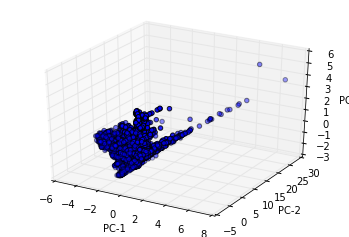

In [52]:
#Scale the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

#use PCA to reduce the dimensionality to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Y_sklearn = pca.fit_transform(X_std)
#Plot results in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')
fig.scatter(Y_sklearn[:,0],Y_sklearn[:,1],Y_sklearn[:,2])
fig.set_xlabel("PC-1")
fig.set_ylabel("PC-2")
fig.set_zlabel("PC-3")
plt.show()

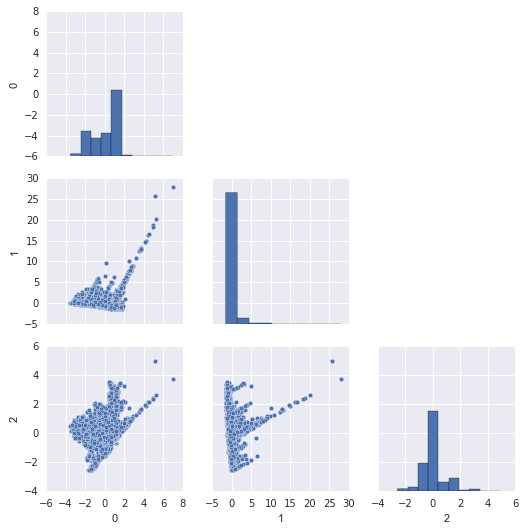

In [58]:
import seaborn as sns
import numpy as np
#Also let's plot it in different 2D views.
g = sns.pairplot(pd.DataFrame(Y_sklearn))
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

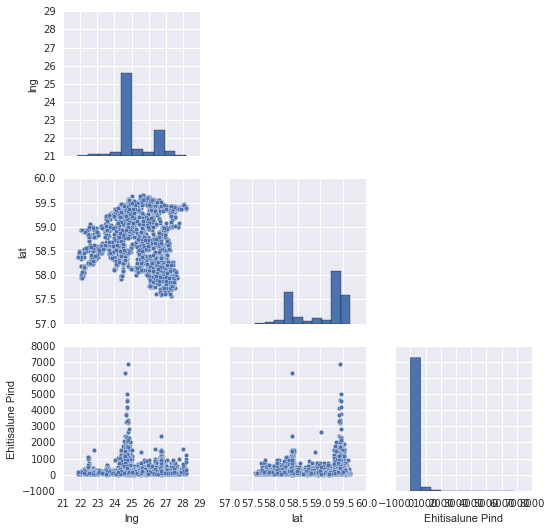

In [60]:
g = sns.pairplot(X)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

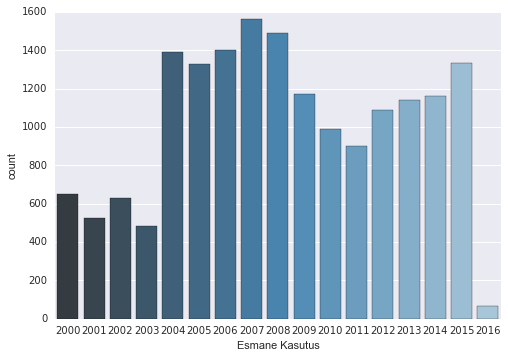

In [65]:
sns.countplot(data=merged,x="Esmane Kasutus", palette="Blues_d")

In [78]:
pd.to_datetime(merged["Esmane Kasutus"], format='%Y').describe()

count                   17312
unique                     17
top       2007-01-01 00:00:00
freq                     1562
first     2000-01-01 00:00:00
last      2016-01-01 00:00:00
Name: Esmane Kasutus, dtype: object

In [83]:
merged["Date Created"][0]

'2004/05/27 13:55:58'

In [67]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17312 entries, 0 to 17311
Data columns (total 43 columns):
Id                            17312 non-null int64
Ehr Kood                      17312 non-null int64
Nimetus                       17311 non-null object
Seisundi kood                 17312 non-null object
Seisundi nimi                 17312 non-null object
Kaos Id Peamine               17312 non-null int64
KAOS kood Peamine             17312 non-null int64
Peamine KAOS                  17312 non-null object
Omandi liigi kood             17312 non-null object
Omandi liigi nimii            17312 non-null object
Aadress tekstina kehtiv       17312 non-null object
Rajatis Hoone                 17312 non-null object
Maakonna kood                 17312 non-null int64
Omavalitsuse kood             17312 non-null int64
Max Korruste Arv              17288 non-null float64
Eh Alust Kp                   7648 non-null float64
Ajeh Kasutalg Kp              0 non-null float64
Ajeh Kasutlopp 